#  K Means Clustering for Type of University  

**Objective**: Use KMeans Clustering to cluster Universities into two groups, Private and Public.

**Data Source**: The publicly available College [dataset](http://www-bcf.usc.edu/~gareth/ISL/College.csv) found in the ISLR package will be used.

**Note:** The data also has label but they wont be used as it is an unsupervised learning algorithm although we will refer to them to analyze how well the algorithm has performed.


## The Data

The data has 777 records with following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
df = pd.read_csv('College_Data',index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

** Scatterplot of Grad.Rate versus Room.Board with hue by the Private column. **

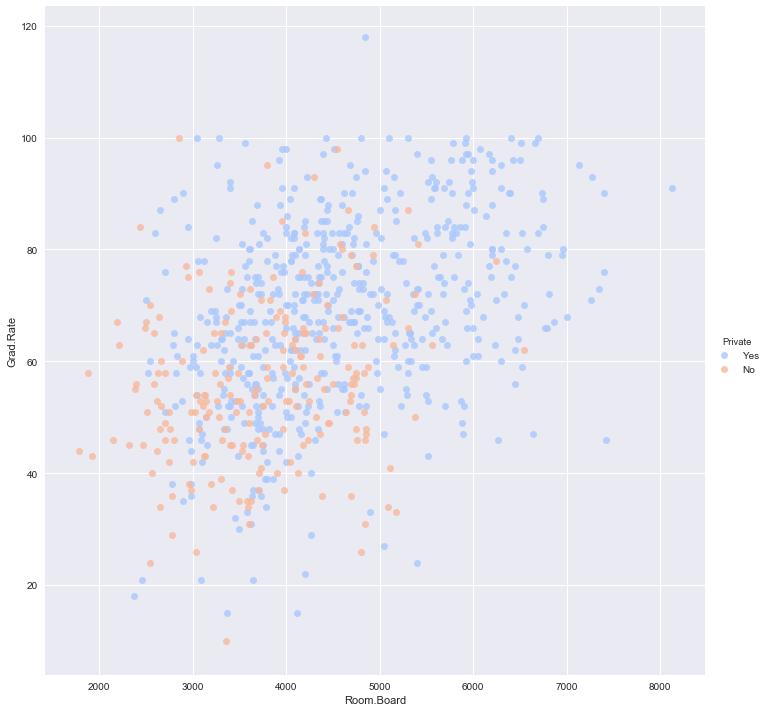

In [6]:
sns.lmplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private',palette='coolwarm',size=10,aspect=1,fit_reg=False)

The private universities have costlier Rooms and Boards and also their overall Graduation rate is better than public universities. One interesting point to note is that one of the universities has graduation rate of over 100%.

**Scatterplot of F.Undergrad versus Outstate with hue by the Private column.**

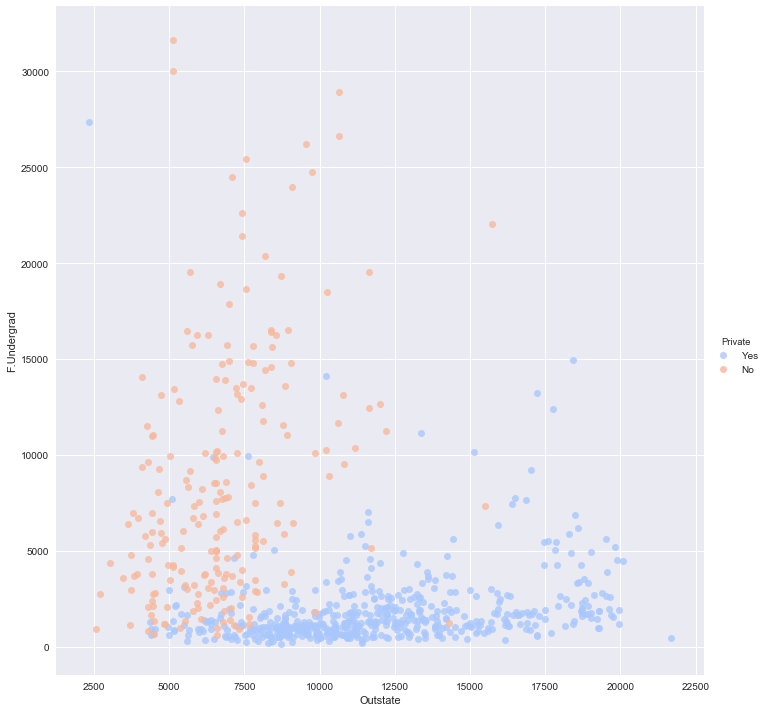

In [7]:
sns.lmplot(data=df,x='Outstate',y='F.Undergrad',hue='Private',palette='coolwarm',size=10,aspect=1,fit_reg=False)

The number of fulltime under graduates are much higher in Public universities but the Out of State tution rate is significantly higher in Private universities.

** Out of State histogram. **

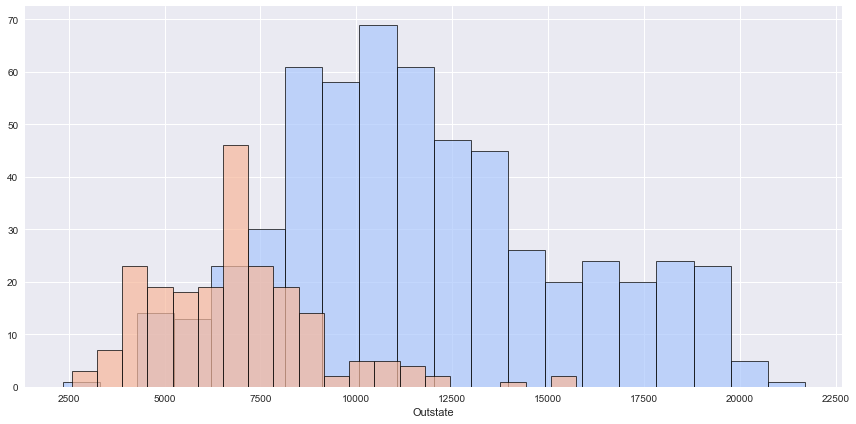

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7,edgecolor='black', linewidth=1)

Revalidating obervation from histogram that Out of State tution rate is much higher in Private universities.

**Grad.Rate histogram.**

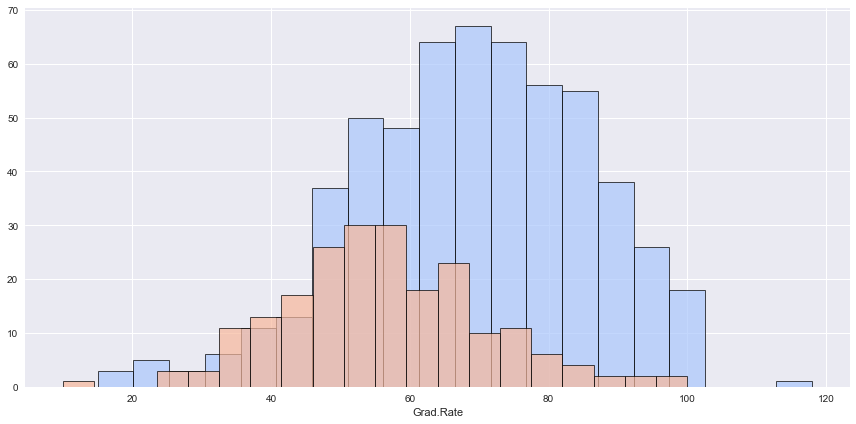

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7,edgecolor='black', linewidth=1)

Also revalidating the higher graduation rate in Private universities and one of the private university showing graduation rate of over 100%. 

Lets find the name of the university.

In [10]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that graduation rate to 100 for 'Cazenovia College' as rate of 118% doesnt make sense.

In [11]:
df.loc['Cazenovia College','Grad.Rate'] = 100

In [12]:
df.loc['Cazenovia College','Grad.Rate']

100

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [13]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [14]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [15]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** cluster center vectors**

In [16]:
kmeans.cluster_centers_

array([[  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01],
       [  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01]])

## Evaluation

Since it is a test data we have labels which are generally not present in clustering data. We will use the target labels to evaluate our model.

Firstly create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [17]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [18]:
df['Cluster'] = df['Private'].apply(converter)

In [19]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Confusion matrix and classification report**

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
             precision    recall  f1-score   support

          0       0.69      0.35      0.46       212
          1       0.79      0.94      0.86       565

avg / total       0.76      0.78      0.75       777



**Finding the optimal number of clusters**

In the given problem we know that the dataset has only 2 groups of clusters i.e. public and private universities. 
There would be situations when the number of clusters are not pre-decided. In such cases you can use one of the followingg methods to determine the ideal number:
- Elbow method
- Silhoutte score analysis
- Dendogram method

Refer to the [link](http://www.awesomestats.in/python-cluster-validation/) for an explanation of each of these 3 methods.

We will use the elbow method in our dataset to analyze the error rate for different number of cluster counts.

In [21]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  kmeans_index = KMeans( num_clusters )
  kmeans_index.fit( df.drop('Private',axis=1) )
  cluster_errors.append( kmeans_index.inertia_ )

In [22]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [23]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,7.204056e+10,1
1,4.835620e+10,2
2,3.236587e+10,3
3,2.551927e+10,4
4,2.075528e+10,5
5,1.774250e+10,6
6,1.571135e+10,7
7,1.438311e+10,8
8,1.317771e+10,9


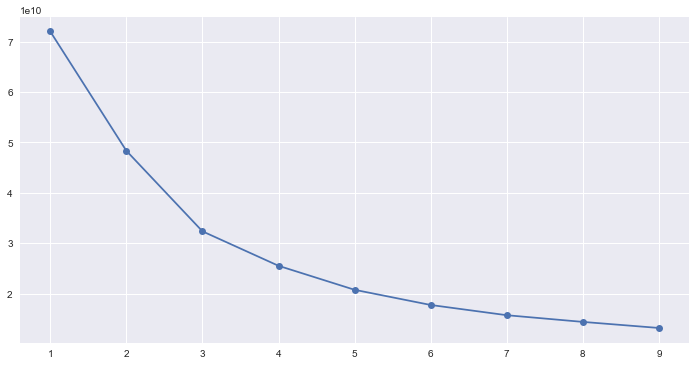

In [24]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**Elbow method conclusion**

If you look at the above figure, there is a clear bend of arm at cluster count 3 and then the slope tapers down with each subsequent cluster count value on X-axis. In this problem since we have the domain knowledge of the dataset, we know the dataset has only 2 clusters. Otherwise if the data would have been generic the ideal cluster count for the dataset would have been 3.